![example](images/director_shot.jpeg)

# Box Office Movie Analysis

**Authors:** Emmanuel Kiplimo
***

## Overview

This project aims to analyze performance of movies in the box office to get a clear picture of what makes a good movie. Through Exploratory Data Analysis (EDA) of movies and reviews data can get a better understanding of the features that contribute to popularity of films.
Microsoft can use this findings to make informed decisions as it plans to enter the films industry. 

## Business Problem

The movie space has been dominated by streaming services like Netflix, Disney and Hulu. Not so long ago, a close competitor, Apple joined in on the fun producing original video content with amaizing blockbusters i.e SEE. This makes it a question of WHEN not IF. Taking a calculated approach by analyzing the genre,movie durations and revenues will render a better understanding of the film industry. Doing so will increase our chances of success upon entry as well as an additonal source of revenue.


## Data Understanding

For this project, I'll be analyzing data from 2 datasets from:
* IMDB database
* BOM csv file
`


### Importing libraries we might need

In [87]:
# Import standard packages
import pandas as pd
import numpy as np
import sqlite3

from collections import OrderedDict
from collections import Counter
import operator
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### Loading Datasets

In [88]:
# Establishing connection with IMDB database
conn = sqlite3.connect("Data/im.db")

#Converting important tables into DataFrames
#Title, Release, Duration, Genres
movie_basics = pd.read_sql("SELECT * FROM movie_basics",conn) 

#movie_id, avgrating, numvotes
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings",conn)

#BOM dataset
BOM = pd.read_csv("Data/bom.movie_gross.csv")


### Exploring the created DataFrames

In [89]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [90]:
movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [91]:

BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## movie_basics & movie_ratings preperation

To clean the data, we have to find an amicable solution to handle duplicates and null values in our datasets

We'll have to drop some irrelevant columns, rename others and merge dataframes. 



Cleaning movie_basics

* Check for duplicated rows and drop if any
* Dropping irrelevant columns for our analysis
* Renaming columns with suitable names
* The movie basics data frame tends to have significant missing values in the 'duration_minutes' and 'genre' columns.





In [92]:
# The column 'original_title' isn't relevant in our analysis 
movie_basics.drop(labels='original_title',inplace=True,axis=1)



In [93]:
# Rename the columns with relevant column names 
movie_basics.rename(columns={'primary_title':'title', 'duration_minutes':'runtime_minutes','start_year':'release','genres':'genre'},inplace=True)

In [94]:
# Determining null values
movie_basics.isna().sum()


movie_id               0
title                  0
release                0
runtime_minutes    31739
genre               5408
dtype: int64

In [95]:
# Dropping rows with null values in the genre column
movie_basics.dropna(subset='genre',inplace=True)

In [96]:
#Mean & Median values of the runtime_minutes column
print("Mean: ",movie_basics['runtime_minutes'].mean())
print("Median: ",movie_basics['runtime_minutes'].median())

Mean:  86.26190157974928
Median:  87.0


In [97]:
# Filling missing values in the runtime_minutes column
movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(),axis=0,inplace=True)


In [98]:
# Let's split the genre column into single value rows
movie_basics['genre'] = movie_basics['genre'].str.split(',')



Cleaning movie_ratings

* Check for duplicates on movie_id column
* drop numvotes column
* concat with movie basics

In [99]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [100]:
movie_ratings['movie_id'].duplicated().sum()

0

movie_ratings seems to be ready for manipulation as it lacks duplicates and all values are present

### Merging movie_basics & movie_ratings

In [101]:
df3 = movie_basics.merge(movie_ratings, on='movie_id', how='inner', suffixes=('B', 'R'))

In [102]:
df3.sort_values(by='averagerating',ascending=False).head(20)

,movie_id,title,release,runtime_minutes,genre,averagerating,numvotes
9664,tt1770682,Freeing Bernie Baran,2010,100.000000,"[Crime, Documentary]",10.0,5
53165,tt5390098,The Paternal Bond: Barbary Macaques,2015,59.000000,[Documentary],10.0,5
65246,tt7259300,Calamity Kevin,2019,77.000000,"[Adventure, Comedy]",10.0,6
42553,tt4109192,I Was Born Yesterday!,2015,31.000000,[Documentary],10.0,6
49589,tt4960818,Revolution Food,2015,70.000000,[Documentary],10.0,8
868,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129.000000,"[Comedy, Drama]",10.0,5
52884,tt5344358,All Around Us,2019,86.261902,[Documentary],10.0,6
70796,tt8730716,Pick It Up! - Ska in the '90s,2019,99.000000,[Documentary],10.0,5
49431,tt4944240,Dog Days in the Heartland,2017,86.261902,[Drama],10.0,5
693,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.000000,[Documentary],10.0,5


In [103]:
Q1 = np.percentile(df3['runtime_minutes'],25)
Q3 = np.percentile(df3['runtime_minutes'],75)
IQR = Q3 - Q1
print('IQR:', IQR)

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

IQR: 19.0
upper limit: 130.5
lower limit: 54.5


In [104]:
#Removing outliers
lower_outliers = df3['runtime_minutes'] < lower_limit
upper_outliers = df3['runtime_minutes']  > upper_limit

outliers = df3[lower_outliers | upper_outliers].index
df3.drop(outliers, inplace=True)


## BOM DataFrame preparation

In [105]:
BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [106]:
BOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [107]:
#Checking for duplicated entries
BOM['title'].duplicated().sum()

1

In [108]:
#Dropping duplicated rows
BOM.drop_duplicates('title',inplace=True)

In [109]:
#Checking for null values
BOM.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1349
year                 0
dtype: int64

We have a signifacant number of missing values in BOM columns, which have to be dealt with for further manipulation

In [110]:
BOM['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [111]:
#Let's fill blanks with 'IFC' as it's the most popular
BOM['studio'].fillna('IFC', inplace=True)

In [112]:
print('Domestic Gross')

print('Mean:',BOM['domestic_gross'].mean().round(3))
print('Median:',BOM['domestic_gross'].median())

Domestic Gross
Mean: 28754392.638
Median: 1400000.0


In [113]:
#Filling missing values in the 'domestic_gross' column with the mean value
BOM['domestic_gross'].fillna(BOM['domestic_gross'].mean(),inplace=True)

In [114]:
#Let's convert the dtype for foreing_gross for further manipulation
BOM['foreign_gross'] = pd.to_numeric(BOM['foreign_gross'],errors = 'coerce')

In [115]:
print('Foreign Gross')
print('Mean:',BOM['foreign_gross'].mean().round(3))
print('Median:',BOM['foreign_gross'].median())

Foreign Gross
Mean: 75057041.625
Median: 18900000.0


In [116]:
#Filling null values with the mean
BOM['foreign_gross'].fillna(BOM['foreign_gross'].mean(),inplace=True)

In [117]:
#Combining domestic_gross with foreign_gross
BOM['worldwide_gross'] = BOM['domestic_gross'] + BOM['foreign_gross']

## Data Analysis

The dataframes are ready for further analysis. We'll get to analyze and visualize features and relationships of top movies based on the following:
* Runtimes
* Genre
* Ratings
* Worldwide revenues
* Studios


### Runtime Analysis

Text(0.5, 0, 'Minutes')

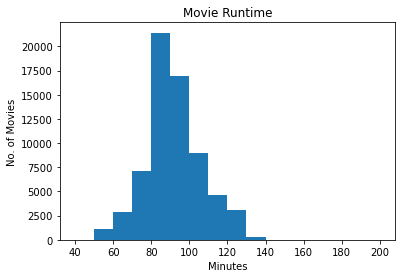

In [118]:
df3['runtime_minutes'].plot.hist(range=(40,200),bins = 16)
plt.title('Movie Runtime')
plt.ylabel("No. of Movies")
plt.xlabel('Minutes')

The above histogram depicts that most movies have a runtimes ranging from 70 minutes to 110 minutes. But we'll have to further analyze this

In [119]:
df3.head()

,movie_id,title,release,runtime_minutes,genre,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.000000,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,86.261902,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"[Comedy, Drama, Fantasy]",6.5,119
5,tt0112502,Bigfoot,2017,86.261902,"[Horror, Thriller]",4.1,32


In [120]:
top_movies = df3.nlargest(15,'averagerating')[['title','runtime_minutes']]
# top_movies.set_index('title')


Text(0, 0.5, 'Title')

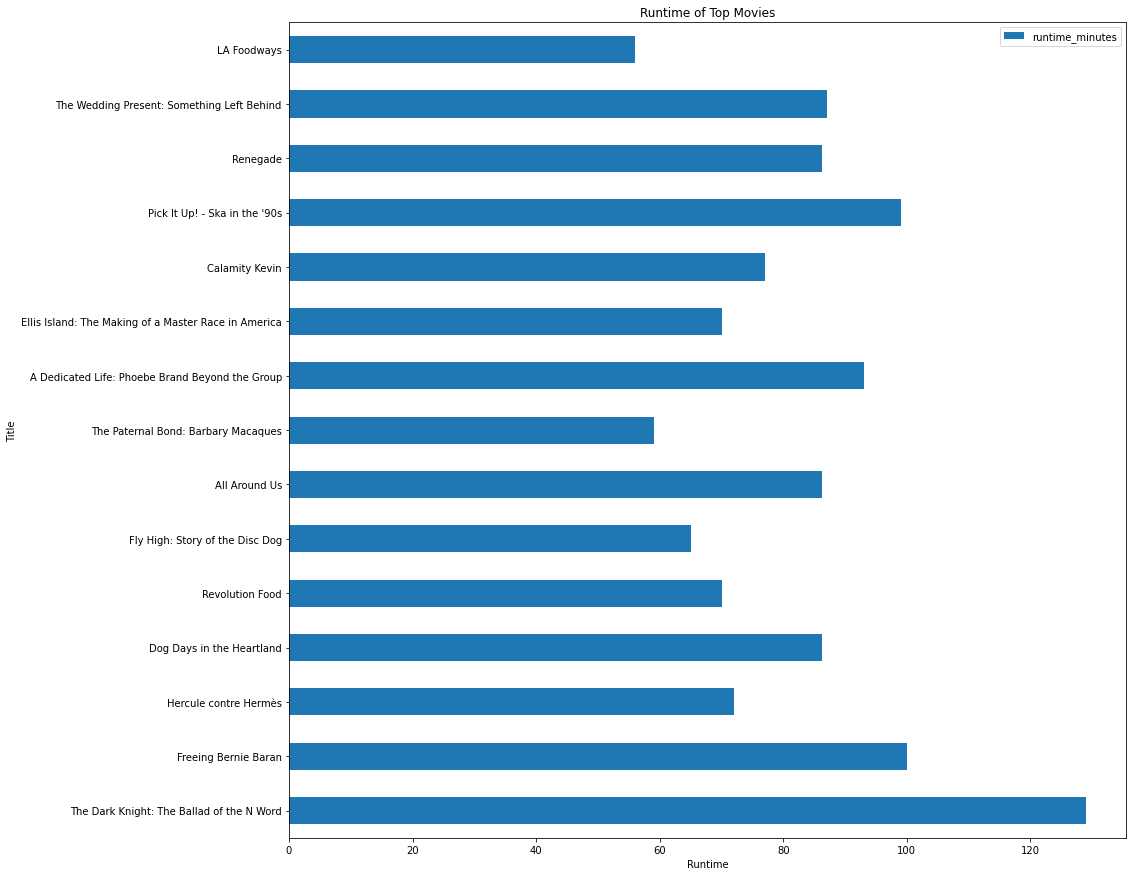

In [121]:
top_movies.plot.barh(x=0,y=1,figsize=(15,15))
plt.title('Runtime of Top Movies')
plt.xlabel('Runtime')
plt.ylabel('Title')


Top rated movies seem to have runtimes of about 70 minutes to 130 minutes

### Genre Analysis

In [122]:
# Overview of some of the genres
df3['genre'].head(10)

1                 [Biography, Drama]
2                            [Drama]
3                    [Comedy, Drama]
4           [Comedy, Drama, Fantasy]
5                 [Horror, Thriller]
6     [Adventure, Animation, Comedy]
8                          [History]
10                           [Drama]
11                     [Documentary]
13                           [Drama]
Name: genre, dtype: object

In [123]:
#Create a list of unique genres
genres = []

for genre in df3['genre']:
    genres.append(genre)

genres

[['Biography', 'Drama'],
 ['Drama'],
 ['Comedy', 'Drama'],
 ['Comedy', 'Drama', 'Fantasy'],
 ['Horror', 'Thriller'],
 ['Adventure', 'Animation', 'Comedy'],
 ['History'],
 ['Drama'],
 ['Documentary'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Mystery'],
 ['Action', 'Animation', 'Comedy'],
 ['Crime', 'Drama'],
 ['Biography', 'Comedy', 'Drama'],
 ['Drama'],
 ['Action', 'Drama'],
 ['Documentary', 'History'],
 ['Comedy'],
 ['Documentary'],
 ['Thriller'],
 ['Crime', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Drama', 'Horror'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Family'],
 ['Adventure', 'Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Adventure', 'Drama', 'Romance'],
 ['Comedy', 'Crime', 'Drama'],
 ['Biography'],
 ['Horror'],
 ['Comedy', 'Drama'],
 ['Drama'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Drama', 'Sci-Fi', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Dr

In [124]:
#Lets flatten our genres list

flat_list = [x for sublist in genres for x in sublist]
print(flat_list)

['Biography', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'History', 'Drama', 'Documentary', 'Drama', 'Drama', 'Drama', 'Mystery', 'Action', 'Animation', 'Comedy', 'Crime', 'Drama', 'Biography', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Documentary', 'History', 'Comedy', 'Documentary', 'Thriller', 'Crime', 'Drama', 'Action', 'Crime', 'Drama', 'Drama', 'Horror', 'Drama', 'Mystery', 'Thriller', 'Drama', 'Family', 'Adventure', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Adventure', 'Animation', 'Comedy', 'Adventure', 'Drama', 'Romance', 'Comedy', 'Crime', 'Drama', 'Biography', 'Horror', 'Comedy', 'Drama', 'Drama', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Sci-Fi', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Action', 'Crime', 'Drama', 'Action', 'Adventure', 'Sci-Fi', 'Action', 'Crime', 'Drama', 'Comedy', 'Drama', 'Crime', 'Drama', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Comedy', 'Family', 'Comedy', 'Dr

In [125]:
 #Function to get unique genres
def unique(myList):
    x = np.array(myList)
    return np.unique(x)

unique_genres = unique(flat_list)

In [126]:

#Count of unique genres
len(unique_genres)

25

In [127]:
movies_genre = Counter(flat_list)
movies_genre

Counter({'Biography': 3417,
         'Drama': 28145,
         'Comedy': 15972,
         'Fantasy': 1948,
         'Horror': 7348,
         'Thriller': 7586,
         'Adventure': 3467,
         'Animation': 1627,
         'History': 2468,
         'Documentary': 15713,
         'Mystery': 2839,
         'Action': 5821,
         'Crime': 4181,
         'Family': 3119,
         'Romance': 5807,
         'Sci-Fi': 2053,
         'Music': 1802,
         'Sport': 1042,
         'Western': 265,
         'Musical': 586,
         'War': 766,
         'News': 519,
         'Reality-TV': 13,
         'Game-Show': 2,
         'Adult': 3})

In [128]:
# Sort the top genres in Descending order
movies_genre = dict( sorted(movies_genre.items(), key=operator.itemgetter(1),reverse=True))

In [129]:
movies_genre

{'Drama': 28145,
 'Comedy': 15972,
 'Documentary': 15713,
 'Thriller': 7586,
 'Horror': 7348,
 'Action': 5821,
 'Romance': 5807,
 'Crime': 4181,
 'Adventure': 3467,
 'Biography': 3417,
 'Family': 3119,
 'Mystery': 2839,
 'History': 2468,
 'Sci-Fi': 2053,
 'Fantasy': 1948,
 'Music': 1802,
 'Animation': 1627,
 'Sport': 1042,
 'War': 766,
 'Musical': 586,
 'News': 519,
 'Western': 265,
 'Reality-TV': 13,
 'Adult': 3,
 'Game-Show': 2}

In [130]:
top10_genres = dict(itertools.islice(movies_genre.items(), 10))
top10_genres

{'Drama': 28145,
 'Comedy': 15972,
 'Documentary': 15713,
 'Thriller': 7586,
 'Horror': 7348,
 'Action': 5821,
 'Romance': 5807,
 'Crime': 4181,
 'Adventure': 3467,
 'Biography': 3417}

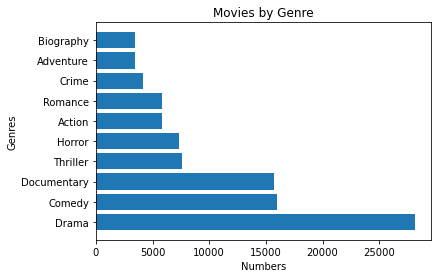

In [131]:
# Ploting the top genres by movie
genre = list(top10_genres.keys())
values = list(top10_genres.values())

plt.barh(range(len(top10_genres)), values, tick_label=genre)
plt.title('Movies by Genre')
plt.ylabel('Genres')
plt.xlabel('Numbers')
plt.show()

From the above visualization we get to see that the top genres are Drama, Comedy and Documentaries

### Worldwide revenue Analysis

In [132]:
#Identify movies that generated the most revenue
top_rev = BOM.nlargest(n=15,columns='worldwide_gross')
top_rev.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


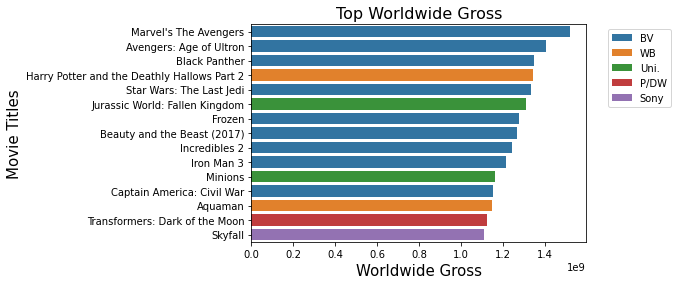

In [133]:
# Graph the results
sns.barplot(data = top_rev, x = 'worldwide_gross', y ='title', hue = 'studio', dodge = False)
plt.title('Top Worldwide Gross', fontsize = 16)
plt.xlabel('Worldwide Gross', fontsize = 15)
plt.ylabel('Movie Titles', fontsize = 15)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2)
plt.show();

BV studio has produced a significant number of top movies based on Worlwide gross(domestic + foreign). Microsoft should therefore research on BV studio's best practices.

## Conclusion
From the analysis performed, I propose:
* A movie with a runtime of 60 minutes and slightly over the 2 hr mark seem to be popular
* Most of the produced movies have an aspect of Drama and Comedy. However this metric doesn't provide an actionable insight. But for sure movies with multiple genres will receive greater attention.
* Top studios seem to have an edge in the movie business. Further analysis of their work will provide more insight on movie plots.

